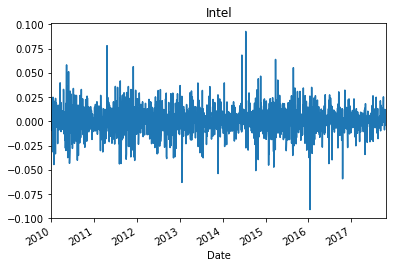

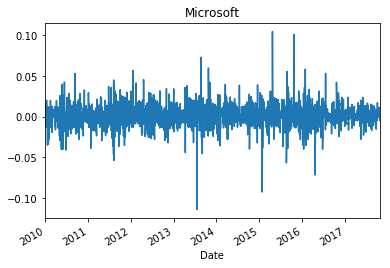

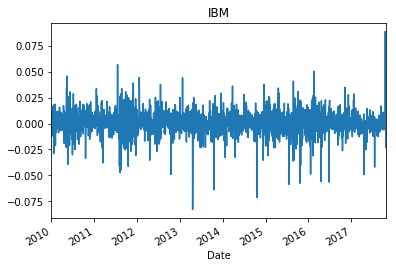

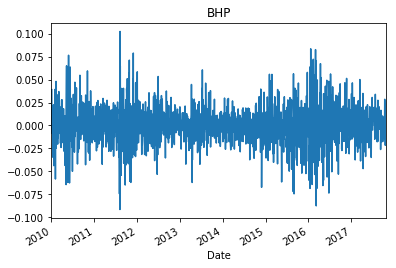

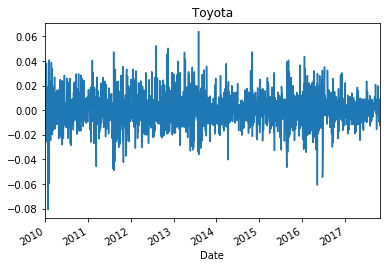

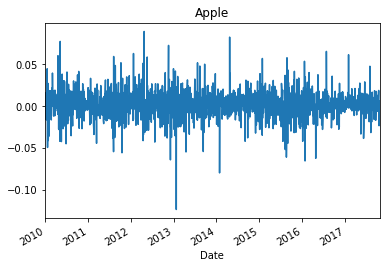

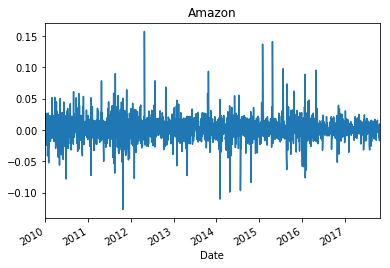

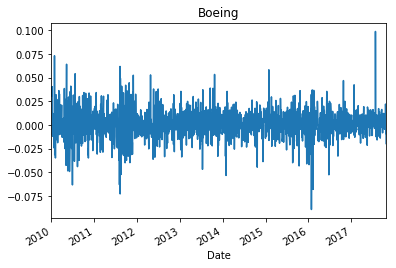

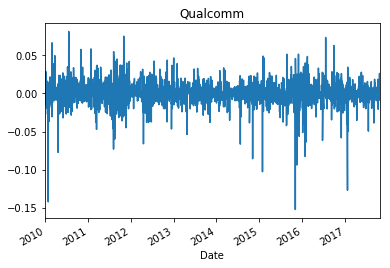

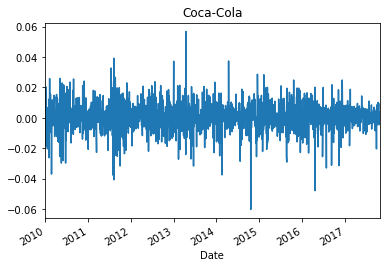

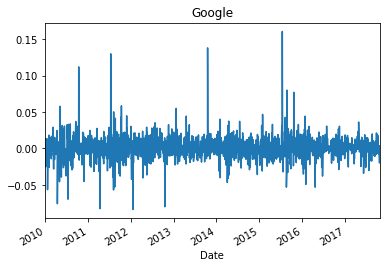

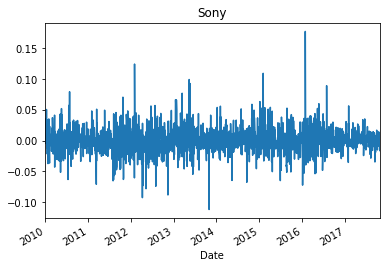

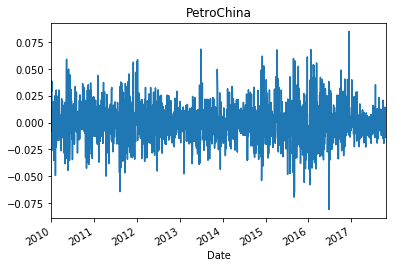

In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb # 需要安装 pip install pandas_datareader
import datetime
from pandas import Series
import matplotlib.pyplot as plt
import matplotlib
'''
需要安装pandas_datareader
pandas.io.data已不可用，现使用的是from pandas_datareader import data, wb和data.DataReader()
连雅虎有墙，最好用vpn或者翻墙
而且推荐在pycharm里调试，不然都不知道程序是否运行结束，不翻墙实在太慢，出全部图起码得5分钟起步（运气好网络连接没断）
'''
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

 #设置日期
start = datetime.datetime(2010, 1, 1)
end=datetime.datetime.now()
#对每个股票进行遍历
for ticker in ticker_list:
    # 从雅虎读入数据
    df=data.DataReader(ticker, 'yahoo', start, end)
    #用调整后的收盘价计算收益率
    df['daliyRate']=df['Adj Close']/df['Adj Close'].shift(1)-1
    df['daliyRate'].plot(title=ticker_list[ticker])
    plt.show()



In [160]:
import pandas as pd
import numpy as np
#读取为长格式的面板数据集
df=pd.read_csv("h:/employ.csv")
#MultiIndex['UNIT','AGE', 'SEX', 'INDIC_EM', 'GEO']
#所有字段：GEO  AGE  UNIT  SEX  INDIC_EM  Value  DATE
#构建宽格式的面板数据集
df=df.pivot_table(values='Value',index='DATE',
            columns=['UNIT', 'AGE', 'SEX','INDIC_EM','GEO'])
mulIx=df.columns.names
#遍历打印
for index in mulIx:
    print(df.columns.get_level_values(index).unique())

Index(['Percentage of total population', 'Thousand persons'], dtype='object', name='UNIT')
Index(['From 15 to 24 years', 'From 25 to 54 years', 'From 55 to 64 years'], dtype='object', name='AGE')
Index(['Females', 'Males', 'Total'], dtype='object', name='SEX')
Index(['Active population', 'Total employment (resident population concept - LFS)'], dtype='object', name='INDIC_EM')
Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Euro area (17 countries)',
       'Euro area (18 countries)', 'Euro area (19 countries)',
       'European Union (15 countries)', 'European Union (27 countries)',
       'European Union (28 countries)', 'Finland',
       'Former Yugoslav Republic of Macedonia, the', 'France',
       'France (metropolitan)',
       'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Polan

GEO                    Austria                                              \
AGE        From 15 to 24 years             From 25 to 54 years               
SEX                    Females Males Total             Females Males Total   
DATE                                                                         
2007-01-01                56.0  62.9  59.4                80.5  92.5  86.5   
2008-01-01                56.2  62.9  59.5                80.9  92.1  86.5   
2009-01-01                56.2  62.9  59.5                82.1  91.9  87.0   
2010-01-01                54.0  62.6  58.3                82.4  91.9  87.1   
2011-01-01                54.8  63.6  59.2                83.2  92.0  87.6   

GEO                                                    Belgium  ...   \
AGE        From 55 to 64 years             From 15 to 24 years  ...    
SEX                    Females Males Total             Females  ...    
DATE                                                            ...    
2007-01-0

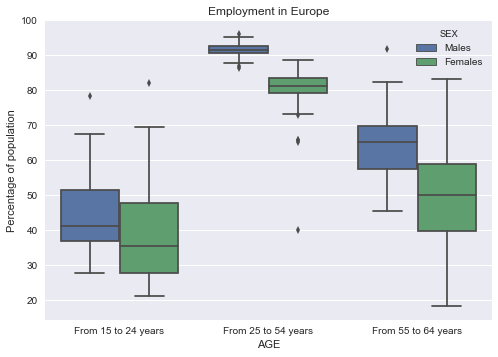

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("h:/employ.csv")
#竖着的层次索引 依次是'UNIT', 'AGE', 'SEX','INDIC_EM','GEO'
df=df.pivot_table(values='Value',index='DATE',
            columns=['UNIT', 'AGE', 'SEX','INDIC_EM','GEO'])
df.index = pd.to_datetime(df.index)
mulIx=df.columns.names
#先将最高层的层次索引过滤掉
df=df['Percentage of total population']
#然后按照下标分别将 'GEO'-->3 ,'AGE'-->0,'SEX'--->1 ,把这3个字段横着放，竖着地方只剩下INDIC_EM
df=df.stack(level=(3,0,1))
#将竖着的INDIC_EM 过滤掉
df=df['Active population']
#把横着的时间 竖起来放
df=df.unstack(level=(0))
#转置
df=df.transpose()
print(df.head())

df=pd.read_csv("h:/employ.csv")
#筛选过滤条件
df=df[(df['INDIC_EM']=='Active population') & (df['UNIT']=='Percentage of total population') & (df['SEX']!='Total') & (df['DATE']=='2015-01-01')]
#作箱形图
'''
sns.boxplot(x=df['AGE'],y=df['Value'],data=df,hue='SEX')  
x表示需要作为横坐标的向量
y表示需要作为纵坐标的向量
data表示dataframe数据源
hue参数表示指定的要再次分组的向量
'''
plt.title('Employment in Europe')
sns.boxplot(x=df['AGE'],y=df['Value'],data=df,hue='SEX')  
plt.ylabel('Percentage of population')
plt.show()